EXERCISE: 01 (a)

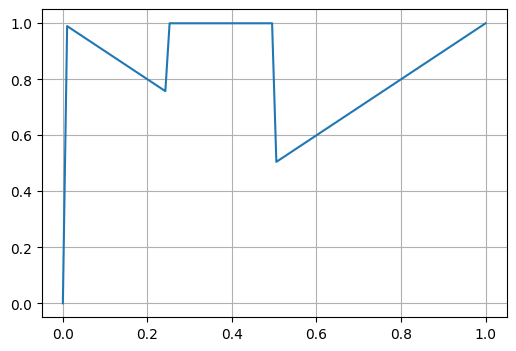

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def piecewise(x):
    if 0 < x <= 0.25:
        return 1 - x
    elif 0.25 < x <= 0.5:
        return 1
    else:
        return x

sliced = np.linspace(0, 1, 100)

plt.figure(figsize=(6, 4))
plt.plot(sliced, [piecewise(x) for x in sliced])
plt.grid()
plt.show()

EXERCISE: 01 (b)

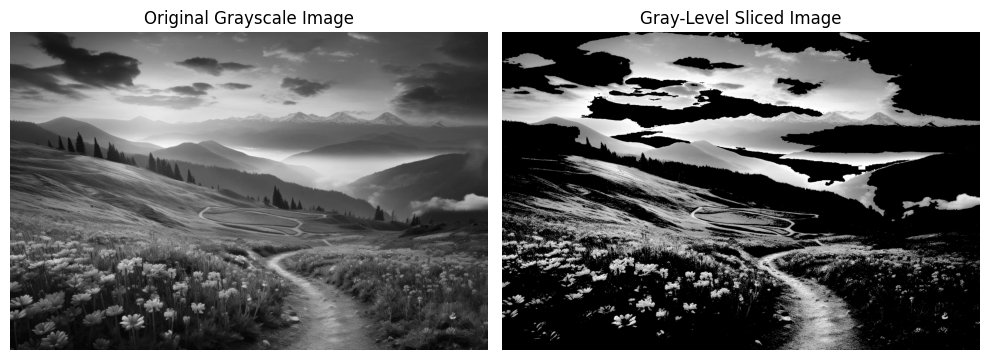

In [3]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh_low = 100
thresh_high = 200

thresh_img = cv2.inRange(gray, thresh_low, thresh_high)

result = cv2.bitwise_and(gray, gray, mask=thresh_img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Gray-Level Sliced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

EXERCISE: 02

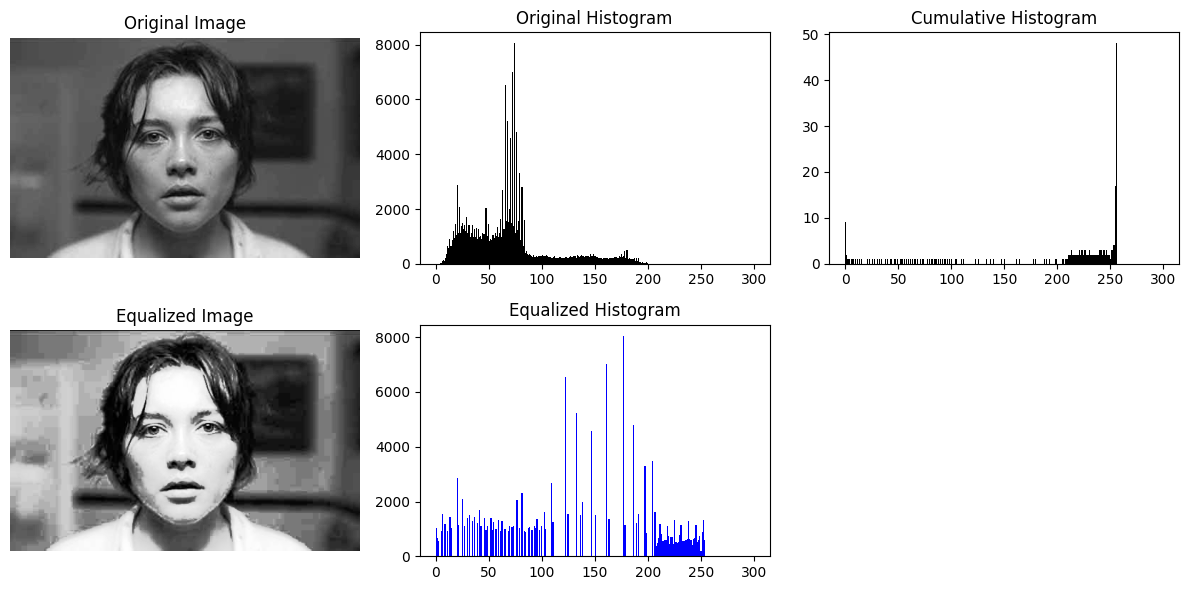

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def myhist_equ(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    r, c = image.shape
    
    h = np.zeros(256, dtype=int)
    
    # Calculate histogram
    for i in range(r):
        for j in range(c):
            h[image[i, j]] += 1
    
    # Calculate cumulative histogram
    cum_h = np.zeros(256, dtype=float)
    cum_h[0] = h[0]
    for k in range(1, 256):
        cum_h[k] = cum_h[k - 1] + h[k]
    
    # Normalize the cumulative histogram
    cum_h = np.floor((cum_h / (r * c)) * 255).astype(np.uint8)
    
    out_image = np.zeros_like(image)
    for i in range(r):
        for j in range(c):
            out_image[i, j] = cum_h[image[i, j]]
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.hist(image.flatten(), bins=300, range=[0, 300], color='black')
    plt.title('Original Histogram')

    plt.subplot(2, 3, 3)
    plt.hist(cum_h, bins=300, range=[0, 300], color='black')
    plt.title('Cumulative Histogram')
    
    plt.subplot(2, 3, 4)
    plt.imshow(out_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.hist(out_image.flatten(), bins=256, range=[0, 300], color='blue')
    plt.title('Equalized Histogram')
    
    plt.tight_layout()
    plt.show()


image = cv2.imread('person.jpg', cv2.IMREAD_GRAYSCALE)
myhist_equ(image)

EXERCISE: 03

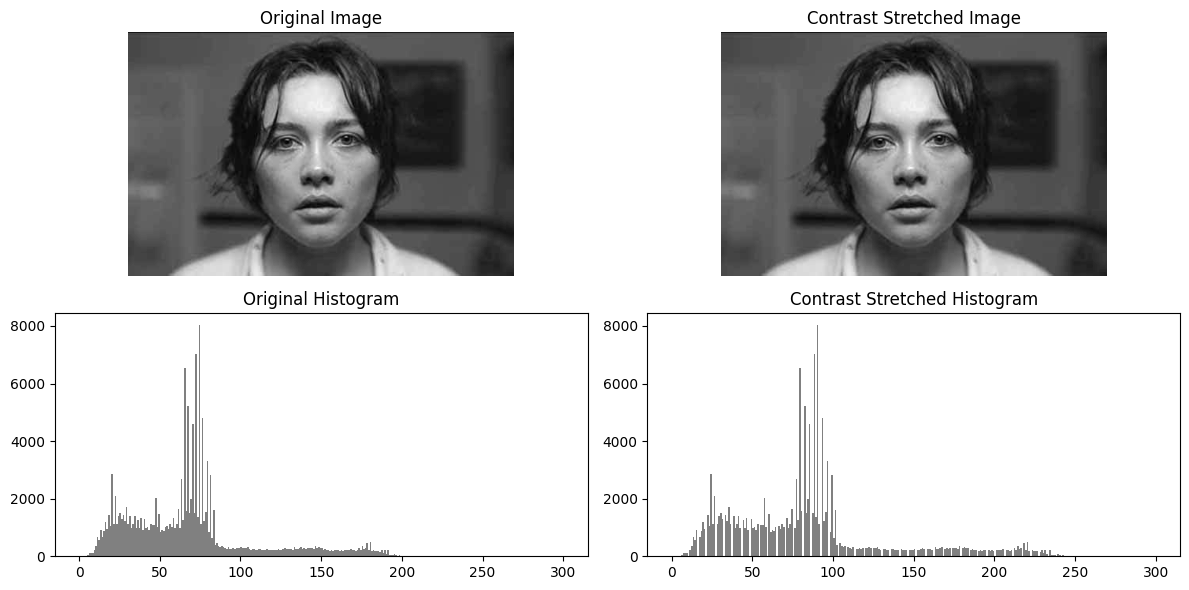

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def contrastStretch(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    r_min = np.min(image)
    r_max = np.max(image)
    
    L = 256  # Number of possible intensity levels
    stretched_image = (image - r_min) * ((L - 1) / (r_max - r_min))
    
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.imshow(stretched_image, cmap='gray')
    plt.title('Contrast Stretched Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 3)
    plt.hist(image.flatten(), bins=300, range=[0, 300], color='gray')
    plt.title('Original Histogram')
    
    plt.subplot(2, 2, 4)
    plt.hist(stretched_image.flatten(), bins=300, range=[0, 300], color='gray')
    plt.title('Contrast Stretched Histogram')
    
    plt.tight_layout()
    plt.show()

image = cv2.imread('person.jpg', cv2.IMREAD_GRAYSCALE)
contrastStretch(image)